# Описание проекта

Необходимо сравнить музыкальные предпочтения пользователей Яндекс.Музыки Москвы и Санкт-Петербурга.

Проверить три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

# Описание данных:

- userID — идентификатор пользователя;
- Track — название трека;
- artist — имя исполнителя;
- genre — название жанра;
- City — город пользователя;
- time — время начала прослушивания;
- Day — день недели.

# Шаг 1. Изучение общей информации

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('/datasets/yandex_music_project.csv')

In [3]:
# получение общей информации о данных в таблице df
df.info()
print('-------------------------------------')

# Вывод на экран в процентах количества пропущенных строк
print((df.isna().mean()*100).round(2))
print('-------------------------------------')

# Поиск дубликатов
print('Дубликатов:', df.duplicated().sum(), 'штук')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB
-------------------------------------
  userID     0.00
Track        1.89
artist      11.07
genre        1.84
  City       0.00
time         0.00
Day          0.00
dtype: float64
-------------------------------------
Дубликатов: 3826 штук


В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку. 

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. 

Необходимо привести названия в соответствие с хорошим стилем:
* несколько слов в названии записать в «змеином_регистре»,
* все символы сделать строчными,
* устранить пробелы.

Для этого надо переименовать колонки так:
* `'  userID'` → `'user_id'`;
* `'Track'` → `'track'`;
* `'  City  '` → `'city'`;
* `'Day'` → `'day'`.

Не все пропущенные значения влияют на исследование. Так в `track` и `artist` пропуски не важны. Достаточно заменить их явными обозначениями.

Пропуски в `genre` могут помешать сравнению музыкальных вкусов. На практике было бы правильно установить причину пропусков и восстановить данные. Такой возможности в этом проекте нет. Придётся:
* заполнить и эти пропуски явными обозначениями,
* оценить, насколько они повредят расчётам. 

Необходимо заменить пропущенные значения в столбцах `track`, `artist` и `genre` на строку `'unknown'`. 

# Шаг 2. Предобработка данных

In [4]:
# переименование столбцов
df = df.rename(columns={
    '  userID': 'user_id',
    'Track': 'track',
    '  City  ': 'city',
    'Day': 'day'})

# перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'
columns_to_replace = ['track', 'artist', 'genre']
for i in columns_to_replace:
    df[i] = df[i].fillna('unknown')

# удаление явных дубликатов (с удалением старых индексов и формированием новых)
df = df.drop_duplicates().reset_index(drop=True)

In [5]:
# Просмотр уникальных названий жанров
df['genre'].sort_values().unique() 

array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'alternativepunk', 'ambient', 'americana',
       'animated', 'anime', 'arabesk', 'arabic', 'arena',
       'argentinetango', 'art', 'audiobook', 'author', 'avantgarde',
       'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass',
       'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks',
       'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean',
       'caucasian', 'celtic', 'chamber', 'chanson', 'children', 'chill',
       'chinese', 'choral', 'christian', 'christmas', 'classical',
       'classicmetal', 'club', 'colombian', 'comedy', 'conjazz',
       'contemporary', 'country', 'cuban', 'dance', 'dancehall',
       'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr',
       'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo',
       'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic',
       'electropop', 'emo', 'entehno', '

В списке жанров есть неявные дубликаты жанра `hiphop`. Их надо удалить.

In [6]:
# Функция для замены неявных дубликатов
def replace_wrong_genres(wrong_genres, correct_genre):
    for wrong_genre in wrong_genres: # перебираем неправильные имена
        df['genre'] = df['genre'].replace(wrong_genre, correct_genre)

In [7]:
# Устранение неявных дубликатов
wrong_genres = ['hip', 'hop', 'hip-hop']
correct_genre = 'hiphop'
replace_wrong_genres(wrong_genres, correct_genre)

In [8]:
# получение общей информации о данных в таблице df
df.info()
print('-------------------------------------')

# Вывод на экран в процентах количества пропущенных строк
print((df.isna().mean()*100).round(2))
print('-------------------------------------')

# Поиск дубликатов
print('Дубликатов:', df.duplicated().sum(), 'штук')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61253 entries, 0 to 61252
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  61253 non-null  object
 1   track    61253 non-null  object
 2   artist   61253 non-null  object
 3   genre    61253 non-null  object
 4   city     61253 non-null  object
 5   time     61253 non-null  object
 6   day      61253 non-null  object
dtypes: object(7)
memory usage: 3.3+ MB
-------------------------------------
user_id    0.0
track      0.0
artist     0.0
genre      0.0
city       0.0
time       0.0
day        0.0
dtype: float64
-------------------------------------
Дубликатов: 0 штук


# Шаг 3. Проверка гипотез

Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Необходимо проверить это предположение по данным о трёх днях недели — понедельнике, среде и пятнице.

In [9]:
# Подсчёт прослушиваний в каждом городе
print(df.groupby('city')['track'].count())
print('-------------------------------------')

# Подсчёт прослушиваний в каждый из трёх дней
print(df.groupby('day')['track'].count())

city
Moscow              42741
Saint-Petersburg    18512
Name: track, dtype: int64
-------------------------------------
day
Friday       21840
Monday       21354
Wednesday    18059
Name: track, dtype: int64


In [10]:
# Функция для подсчёта прослушиваний для конкретного города и дня.
# С помощью последовательной фильтрации с логической индексацией она 
# сначала получит из исходной таблицы строки с нужным днём,
# затем из результата отфильтрует строки с нужным городом,
# методом count() посчитает количество значений в колонке user_id. 
# Это количество функция вернёт в качестве результата
def number_tracks(day, city):
    track_list = df[(df['day'] == day)&(df['city'] == city)]
    track_list_count = track_list['user_id'].count()
    return track_list_count

In [11]:
funk1 = ['Moscow'] # Список для данных по Москве
funk2 = ['Saint-Petersburg'] # Список для данных по Питеру
days, citys = ['Monday', 'Wednesday', 'Friday'], ['Moscow', 'Saint-Petersburg']
for i in citys:
    if i == 'Moscow':
        for a in days:
            print(i, a, number_tracks(a, i))
            funk1.append(number_tracks(a, i))
        
    elif i == 'Saint-Petersburg':
        for a in days:
            print(i, a, number_tracks(a, i))
            funk2.append(number_tracks(a, i))

funk = [funk1] + [funk2] 

Moscow Monday 15740
Moscow Wednesday 11056
Moscow Friday 15945
Saint-Petersburg Monday 5614
Saint-Petersburg Wednesday 7003
Saint-Petersburg Friday 5895


In [14]:
# Таблица с результатами
data = pd.DataFrame(data = funk, columns=['city', 'monday', 'wednesday', 'friday'])
data

,city,monday,wednesday,friday
0,Moscow,15740,11056,15945
1,Saint-Petersburg,5614,7003,5895


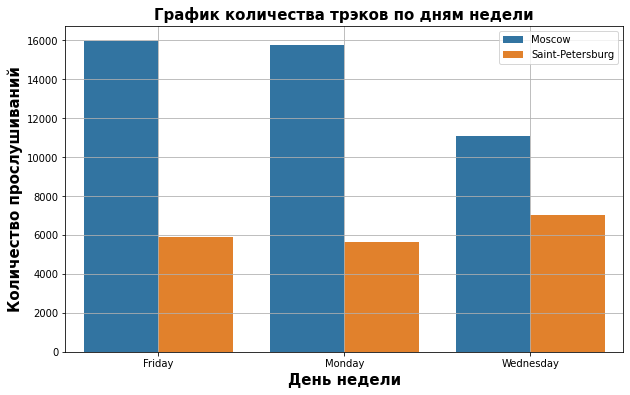

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='track', data=df.groupby(['city', 'day'])['track'].count().reset_index(), hue='city')
plt.title('График количества трэков по дням недели', fontsize=15, fontweight='bold')
plt.xlabel('День недели', fontsize=15, fontweight='bold')
plt.ylabel('Количество прослушиваний', fontsize=15, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid()
plt.show()

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, данные говорят в пользу первой гипотезы.

### Музыка в начале и в конце недели

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

In [30]:
moscow_general = df[df['city'] == 'Moscow']
spb_general = df[df['city'] == 'Saint-Petersburg']

In [49]:
# Объявление функции genre_weekday() с параметрами table, day, time1, time2,
# которая возвращает информацию о самых популярных жанрах в указанный день в
# заданное время:
def genre_weekday(table, day, time1, time2):

# 1) в переменную genre_df сохраняются те строки переданного датафрейма table, для
#    которых одновременно:
#    - значение в столбце day равно значению аргумента day
#    - значение в столбце time больше значения аргумента time1
#    - значение в столбце time меньше значения аргумента time2
#    Используйте последовательную фильтрацию с помощью логической индексации.
    genre_df = table[(table['day'] == day)&
                    (table['time'] > time1)&
                    (table['time'] < time2)]
# 2) сгруппировать датафрейм genre_df по столбцу genre, взять один из его
#    столбцов и посчитать методом count() количество записей для каждого из
#    присутствующих жанров, получившийся Series записать в переменную
#    genre_df_count
    genre_df_count = genre_df.groupby('genre')['track'].count()
# 3) отсортировать genre_df_count по убыванию встречаемости и сохранить
#    в переменную genre_df_sorted
    genre_df_sorted = genre_df_count.sort_values(ascending=False).reset_index()
# 4) вернуть Series из 10 первых значений genre_df_sorted, это будут топ-10
#    популярных жанров (в указанный день, в заданное время)
    return genre_df_sorted.head(10)

In [51]:
# вызов функции для утра понедельника в Москве 
display('Жанры утра понедельника в Москве:', genre_weekday(moscow_general, 'Monday', '07:00', '11:00'))
print('-------------------------------------')

# вызов функции для утра понедельника в Петербурге
display('Жанры утра понедельника в Санкт-Петербурге', genre_weekday(spb_general, 'Monday', '07:00', '11:00'))

'Жанры утра понедельника в Москве:'

,genre,track
0,pop,781
1,dance,549
2,electronic,480
3,rock,474
4,hiphop,286
5,ruspop,186
6,world,181
7,rusrap,175
8,alternative,164
9,unknown,161


-------------------------------------


'Жанры утра понедельника в Санкт-Петербурге'

,genre,track
0,pop,218
1,dance,182
2,rock,162
3,electronic,147
4,hiphop,80
5,ruspop,64
6,alternative,58
7,rusrap,55
8,jazz,44
9,classical,40


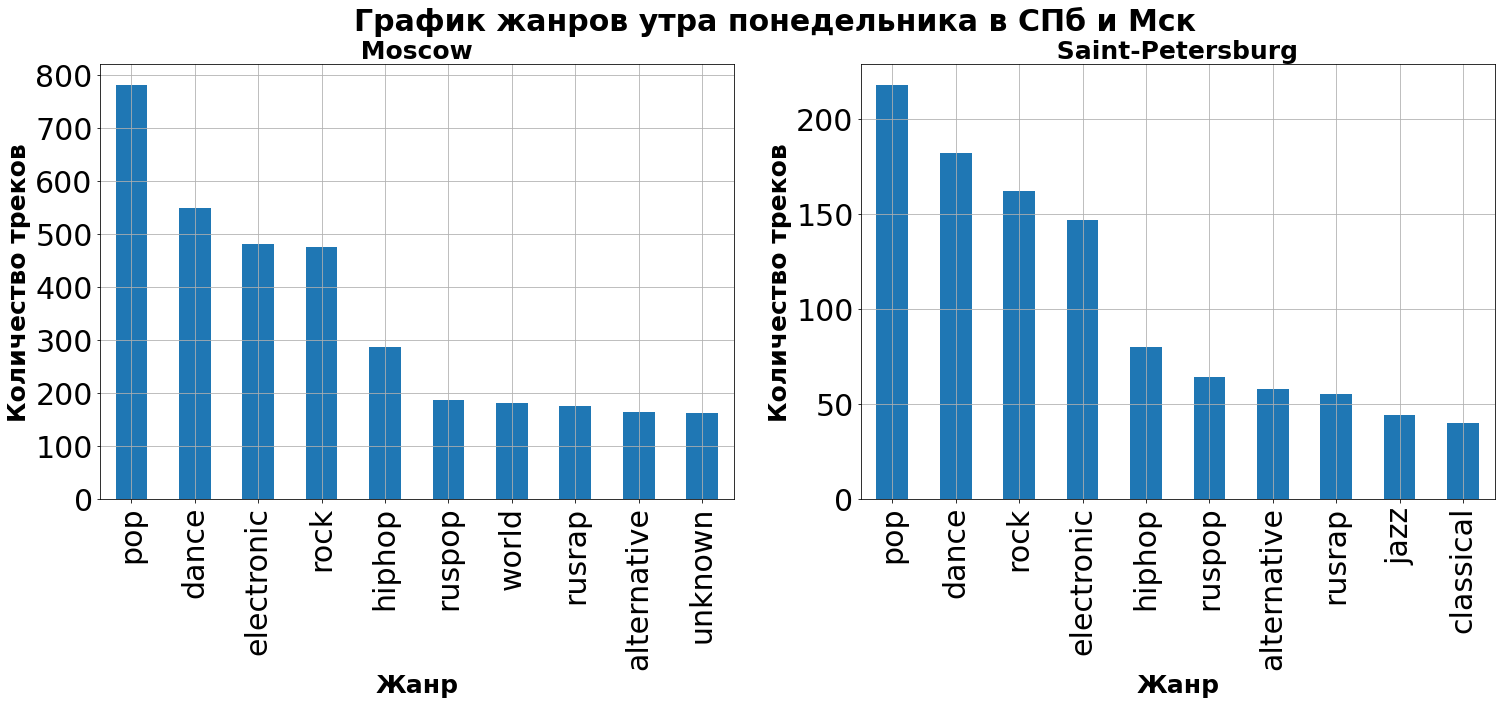

In [90]:
# Построение графика
def graph (city, day, time1, time2, axes):
    
    df[(df['city'] == city)&
       (df['day'] == day)&
       (df['time'] > time1)&
       (df['time'] < time2)].groupby('genre')['track'].count().sort_values(
        ascending=False).reset_index().head(10).plot(x='genre',
                                            y='track', 
                                            kind='bar', 
                                            grid=True,
                                            legend=False,
                                            fontsize = 30,
                                            ax = axes)    
    axes.set_title(f" {city} ", fontsize = 25, fontweight='bold')
    axes.set_xlabel('Жанр', fontsize = 25, fontweight='bold')
    axes.set_ylabel('Количество треков', fontsize = 25, fontweight='bold')

fig, axes = plt.subplots(1, 2, figsize = (25, 8))
fig.suptitle('График жанров утра понедельника в СПб и Мск', fontsize = 30, fontweight='bold')
graph('Moscow', 'Monday', '07:00', '11:00', axes[0])
graph('Saint-Petersburg', 'Monday', '07:00', '11:00', axes[1])
plt.show()

In [37]:
# вызов функции для вечера пятницы в Москве
display('Жанры вечера пятницы в Москве:', genre_weekday(moscow_general, 'Friday', '17:00', '23:00'))
print('-------------------------------------')

# вызов функции для вечера пятницы в Петербурге
display('Жанры вечера пятницы в Санкт-Петербурге', genre_weekday(spb_general, 'Friday', '17:00', '23:00'))

'Жанры вечера пятницы в Москве:'

genre
pop            713
rock           517
dance          495
electronic     482
hiphop         273
world          208
ruspop         170
alternative    163
classical      163
rusrap         142
Name: track, dtype: int64

-------------------------------------


'Жанры вечера пятницы в Санкт-Петербурге'

genre
pop            256
electronic     216
rock           216
dance          210
hiphop          97
alternative     63
jazz            61
classical       60
rusrap          59
world           54
Name: track, dtype: int64

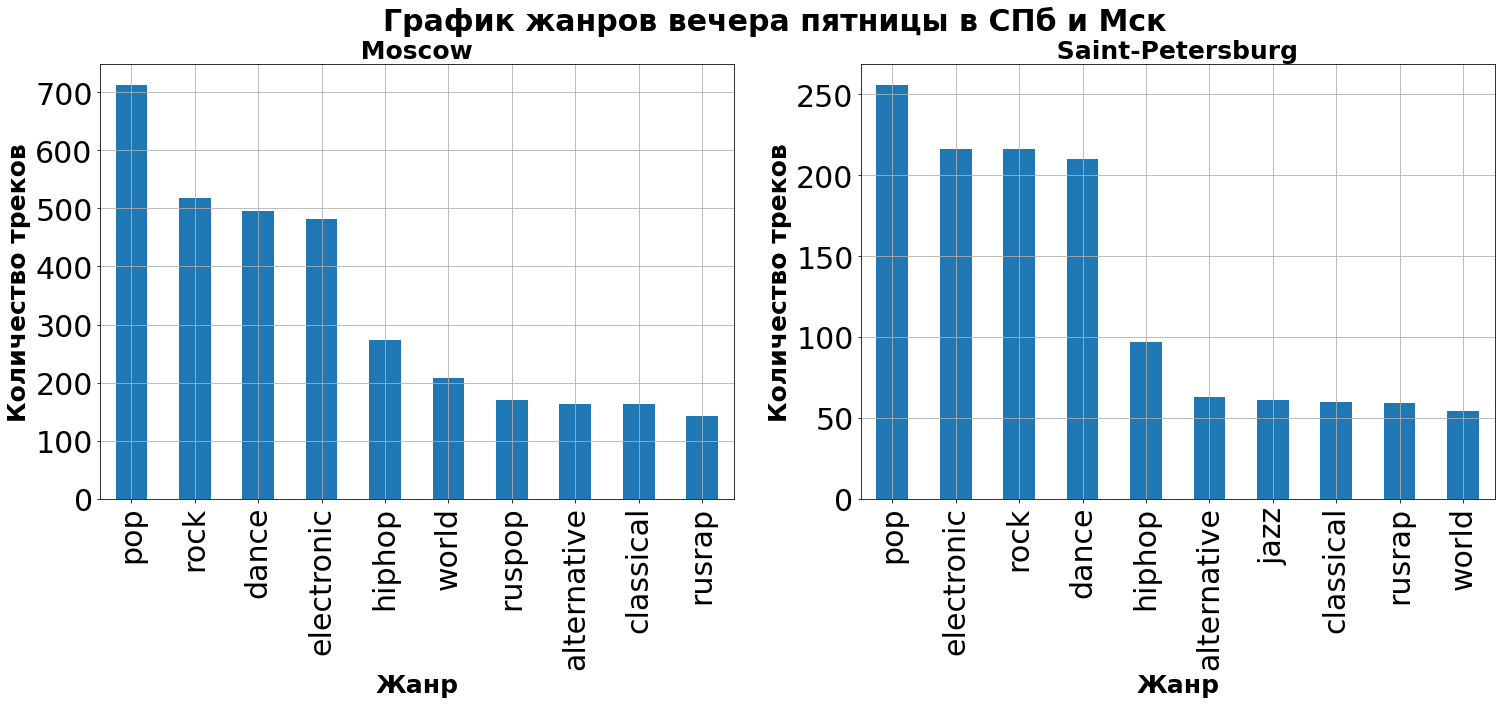

In [87]:
# Построение графика
fig, axes = plt.subplots(1, 2, figsize = (25, 8))
fig.suptitle('График жанров вечера пятницы в СПб и Мск', fontsize = 30, fontweight='bold')
graph('Moscow', 'Friday', '17:00', '23:00', axes[0])
graph('Saint-Petersburg', 'Friday', '17:00', '23:00', axes[1])
plt.show()

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве.  А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

In [40]:
display('Музыкальные предпочтения в Москве:', 
        moscow_general.groupby('genre')['track'].count().sort_values(ascending=False).head(10))
print('-------------------------------------')
display('Музыкальные предпочтения в Санкт-Петербурге:', 
        spb_general.groupby('genre')['track'].count().sort_values(ascending=False).head(10))

'Музыкальные предпочтения в Москве:'

genre
pop            5892
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1379
ruspop         1372
rusrap         1161
Name: track, dtype: int64

-------------------------------------


'Музыкальные предпочтения в Санкт-Петербурге:'

genre
pop            2431
dance          1932
rock           1879
electronic     1736
hiphop          960
alternative     649
classical       646
rusrap          564
ruspop          538
world           515
Name: track, dtype: int64

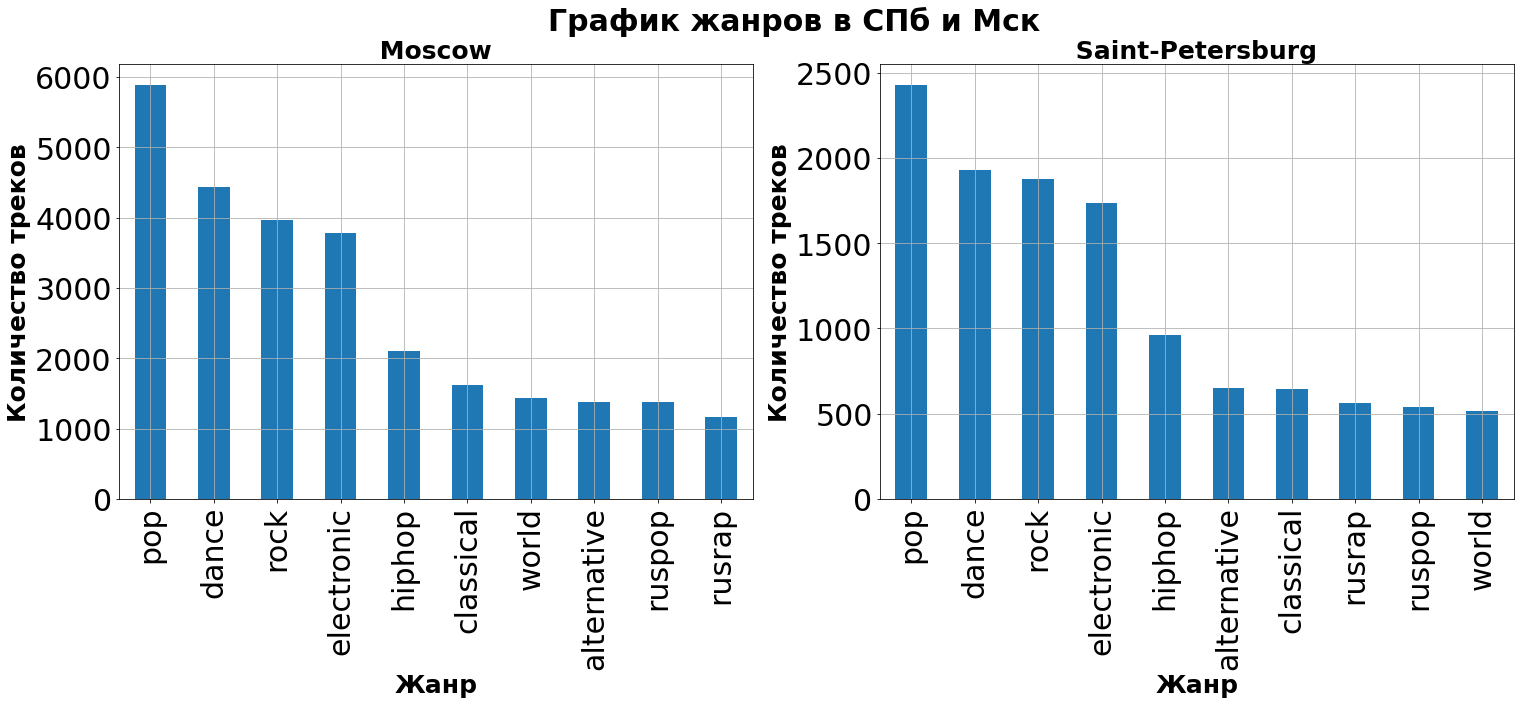

In [89]:
# Построение графика
def graph_g (city, axes):
    
    df[df['city'] == city].groupby('genre')['track'].count().sort_values(ascending=False).reset_index().head(10).plot(x='genre',
                                            y='track', 
                                            kind='bar', 
                                            grid=True,
                                            legend=False,
                                            fontsize = 30,
                                            ax = axes)    
    axes.set_title(f" {city} ", fontsize = 25, fontweight='bold')
    axes.set_xlabel('Жанр', fontsize = 25, fontweight='bold')
    axes.set_ylabel('Количество треков', fontsize = 25, fontweight='bold')

fig, axes = plt.subplots(1, 2, figsize = (25, 8))
fig.suptitle('График жанров в СПб и Мск', fontsize = 30, fontweight='bold')
graph_g('Moscow', axes[0])
graph_g('Saint-Petersburg', axes[1])
plt.show()

Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге. 

# Выводы

Проверка трех гипотез установила:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.